In [136]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the default plotting style so that all graphs look clean and readable.
plt.style.use("default")


In [137]:
#from google.colab import files
#uploaded = files.upload()


In [138]:
import os
os.listdir()


['.config',
 'drive',
 'Figure2_Average_HDI_by_Region.png',
 'HDI_problem1B.csv',
 'Figure4_HDI_vs_GNI.png',
 'Figure1_HDI_Trend_2020_2022.png',
 'HDI_SouthAsia.csv',
 'HDI_category_added.csv',
 'Figure3_HDI_Boxplot.png',
 'sample_data']

In [139]:
#Load Dataset
df = pd.read_csv(
    "/content/drive/MyDrive/ass_final1/Human_Development_Index_Dataset.csv",
    encoding="latin1"
)

df.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


In [140]:
#Check Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 6798 non-null   int64  
 1   iso3                       6798 non-null   object 
 2   country                    6798 non-null   object 
 3   year                       6798 non-null   int64  
 4   hdi                        6171 non-null   float64
 5   life_expectancy            6798 non-null   float64
 6   pop_millions               6798 non-null   float64
 7   hdi_f                      5014 non-null   float64
 8   hdi_m                      5014 non-null   float64
 9   life_expec_f               6798 non-null   float64
 10  life_expec_m               6798 non-null   float64
 11  expec_yr_school            6550 non-null   float64
 12  expec_yr_school_f          6270 non-null   float64
 13  expec_yr_school_m          6270 non-null   float

In [141]:
#Identify Unique Years
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['year'].unique()


array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [142]:
#Filter Latest Year (2022)
hdi_2022_df = df[df['year'] == 2022].copy()
hdi_2022_df.head(10)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [143]:
#Rows & Columns Count
print("Rows:", hdi_2022_df.shape[0])
print("Columns:", hdi_2022_df.shape[1])


Rows: 206
Columns: 30


In [144]:
#Column Names & Data Types
hdi_2022_df.dtypes


,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


In [145]:
#Check Missing Values
hdi_2022_df.isnull().sum()


,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0


In [146]:
#Data Cleaning
numeric_cols = ['hdi', 'life expectancy', 'gross inc percap', 'gender development']

for col in numeric_cols:
    if col in hdi_2022_df.columns:
        hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')

hdi_2022_df.drop_duplicates(inplace=True)
hdi_2022_df.dropna(subset=['hdi', 'country'], inplace=True)


In [147]:
#Basic Statistics (HDI)
mean_hdi = hdi_2022_df['hdi'].mean()
median_hdi = hdi_2022_df['hdi'].median()
std_hdi = hdi_2022_df['hdi'].std()

mean_hdi, median_hdi, std_hdi


(np.float64(0.7228872549019609), 0.7395, 0.15302880386427825)

In [148]:
#Country with Highest HDI
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()][['country', 'hdi']]


,5609
country,Switzerland
hdi,0.967


In [149]:
#Country with Lowest HDI
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()][['country', 'hdi']]


,5345
country,Somalia
hdi,0.38


In [150]:
#Filter HDI > 0.800
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]
high_hdi_df.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [151]:
hdi_2022_df.columns = (
    hdi_2022_df.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
)


In [152]:
#Sort by GNI per Capita (Descending)
high_hdi_sorted = high_hdi_df.sort_values(
    by='gross_inc_percap',
    ascending=False
)

high_hdi_sorted.head(10)



,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,...,0.949,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
2474,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,...,0.972,NaN,77.866913,84.067802,NaN,NaN,52.91,64.71,4.373242,NaN


In [153]:
#Sort by GNI per Capita (Descending)
def hdi_category(hdi):
    if hdi < 0.550:
        return "Low"
    elif hdi < 0.700:
        return "Medium"
    elif hdi < 0.800:
        return "High"
    else:
        return "Very High"

hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(hdi_category)
hdi_2022_df[['country', 'hdi', 'HDI Category']].head()


,country,hdi,HDI Category
32,Afghanistan,0.462,Low
65,Albania,0.789,High
98,Algeria,0.745,High
131,Andorra,0.884,Very High
164,Angola,0.591,Medium


In [154]:
#Save Final CSV
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)


In [155]:
#PROBLEM 1B – HDI Trend (2020–2022)
#Filter Years 2020–2022
hdi_1b_df = df[df['year'].isin([2020, 2021, 2022])].copy()
hdi_1b_df.to_csv("HDI_problem1B.csv", index=False)


In [156]:
#Clean Problem 1B Data
hdi_1b_df.dropna(subset=['hdi', 'country', 'year'], inplace=True)
hdi_1b_df.drop_duplicates(inplace=True)


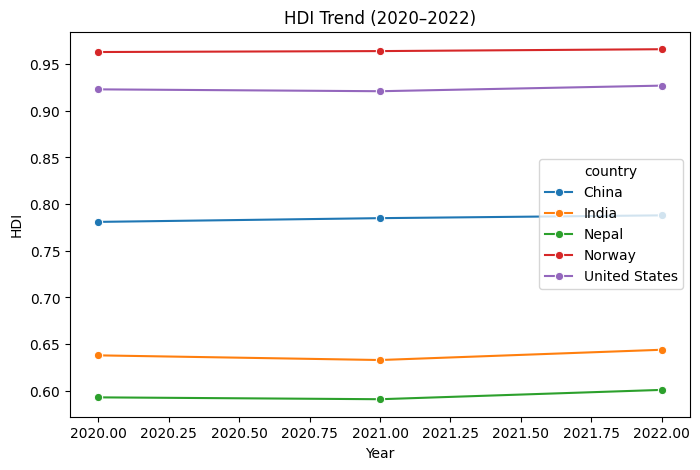

In [157]:
#Line Chart (5 Countries)
countries = ['Nepal', 'India', 'China', 'United States', 'Norway']
line_df = hdi_1b_df[hdi_1b_df['country'].isin(countries)]

plt.figure(figsize=(8,5))
sns.lineplot(data=line_df, x='year', y='hdi', hue='country', marker='o')
plt.title("HDI Trend (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()


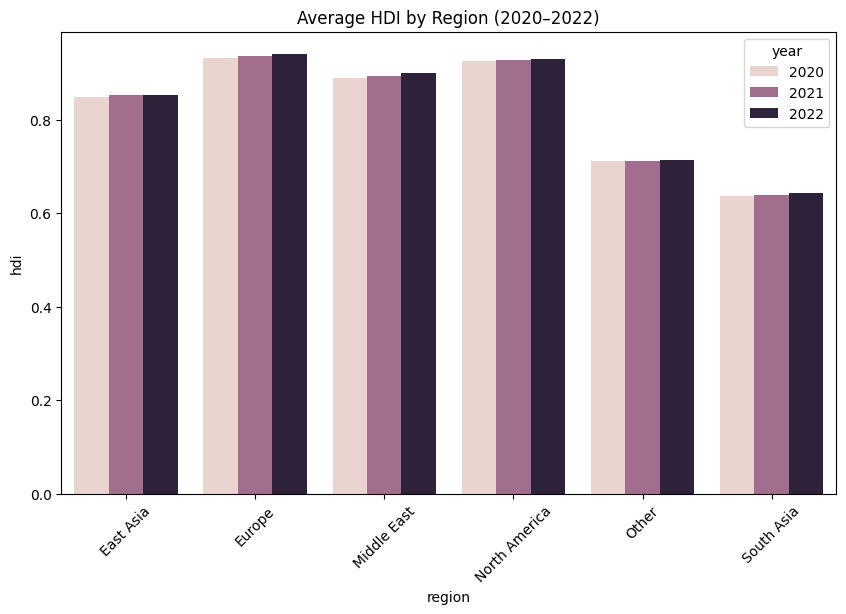

In [158]:
#Average HDI by Region (Bar Chart)
# Create region mapping manually
region_map = {
    "South Asia": ["Afghanistan","Bangladesh","Bhutan","India","Maldives","Nepal","Pakistan","Sri Lanka"],
    "Europe": ["Norway","Germany","France","United Kingdom"],
    "North America": ["United States","Canada"],
    "East Asia": ["China","Japan","South Korea"],
    "Middle East": ["Qatar","Saudi Arabia","United Arab Emirates","Israel"]
}

def assign_region(country):
    for region, countries in region_map.items():
        if country in countries:
            return region
    return "Other"

hdi_1b_df['region'] = hdi_1b_df['country'].apply(assign_region)

region_avg = hdi_1b_df.groupby(['region', 'year'])['hdi'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=region_avg, x='region', y='hdi', hue='year')
plt.xticks(rotation=45)
plt.title("Average HDI by Region (2020–2022)")
plt.show()


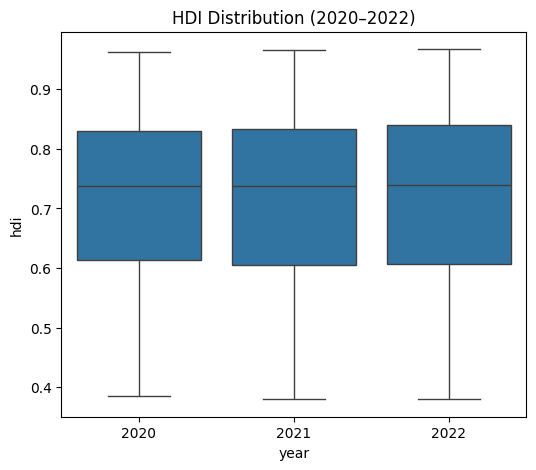

In [159]:
#Box Plot (HDI Distribution)
plt.figure(figsize=(6,5))
sns.boxplot(data=hdi_1b_df, x='year', y='hdi')
plt.title("HDI Distribution (2020–2022)")
plt.show()


In [160]:
#Scatter Plot (HDI vs GNI)
if 'gross inc percap' in hdi_1b_df.columns:
    plt.figure(figsize=(6,5))
    sns.regplot(data=hdi_1b_df, x='gross inc percap', y='hdi', scatter_kws={'alpha':0.5})
    plt.title("HDI_vs_GNI_per_Capita")
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")


GNI per Capita variable not available in the dataset.


In [161]:
#PROBLEM 2 – Advanced HDI
#South Asia Subset
south_asia = ["Afghanistan", "Bangladesh", "Bhutan", "India",
              "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

hdi_sa_df = df[df['country'].isin(south_asia)].copy()
hdi_sa_df.to_csv("HDI_SouthAsia.csv", index=False)


In [162]:
#Composite Development Score
hdi_sa_df['Composite Score'] = (
    0.30 * hdi_sa_df['life_expectancy'] +
    0.30 * hdi_sa_df['gross_inc_percap']
)

hdi_sa_df.sort_values(
    by='Composite Score',
    ascending=False
)[['country', 'Composite Score']]


,country,Composite Score
3530,Maldives,5678.289357
3527,Maldives,5628.012408
3526,Maldives,5440.721295
3525,Maldives,5266.375503
3524,Maldives,5097.397866
...,...,...
8,Afghanistan,384.070969
4,Afghanistan,376.051646
9,Afghanistan,353.150571
10,Afghanistan,330.792206


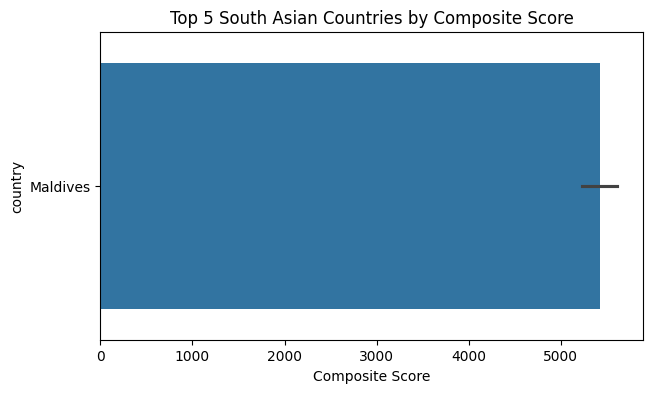

In [163]:
#Top 5 Composite Score Plot
top5 = hdi_sa_df.sort_values(by='Composite Score', ascending=False).head(5)

plt.figure(figsize=(7,4))
sns.barplot(data=top5, y='country', x='Composite Score')
plt.title("Top 5 South Asian Countries by Composite Score")
plt.show()


In [164]:
#Correlation Analysis
hdi_sa_df[['hdi', 'life_expectancy', 'gender_development']].corr()


,hdi,life_expectancy,gender_development
hdi,1.000000,0.958761,0.865621
life_expectancy,0.958761,1.000000,0.829553
gender_development,0.865621,0.829553,1.000000


In [165]:
#GNI–HDI Gap
hdi_sa_df['GNI_HDI_Gap'] = hdi_sa_df['gross_inc_percap'] - hdi_sa_df['hdi']
hdi_sa_df.sort_values(by='GNI_HDI_Gap')[['country', 'GNI_HDI_Gap']]


,country,GNI_HDI_Gap
11,Afghanistan,980.789554
10,Afghanistan,1047.002686
9,Afghanistan,1121.985570
4,Afghanistan,1201.710488
8,Afghanistan,1226.964565
...,...,...
3498,Maldives,NaN
3499,Maldives,NaN
3500,Maldives,NaN
3501,Maldives,NaN


In [166]:
#PROBLEM 3 – Regional Comparison
#Middle East Subset
middle_east = ["Bahrain","Iran","Iraq","Israel","Jordan","Kuwait",
               "Lebanon","Oman","Palestine","Qatar","Saudi Arabia",
               "Syria","United Arab Emirates","Yemen"]

sa_1b = hdi_1b_df[hdi_1b_df['country'].isin(south_asia)]
me_1b = hdi_1b_df[hdi_1b_df['country'].isin(middle_east)]


In [167]:
#Mean HDI Comparison
sa_1b['hdi'].mean(), me_1b['hdi'].mean()


(np.float64(0.6395833333333333), np.float64(0.7889090909090909))

In [168]:
#Coefficient of Variation
sa_cv = sa_1b['hdi'].std() / sa_1b['hdi'].mean()
me_cv = me_1b['hdi'].std() / me_1b['hdi'].mean()

sa_cv, me_cv


(np.float64(0.1536520924690084), np.float64(0.17910145193048382))

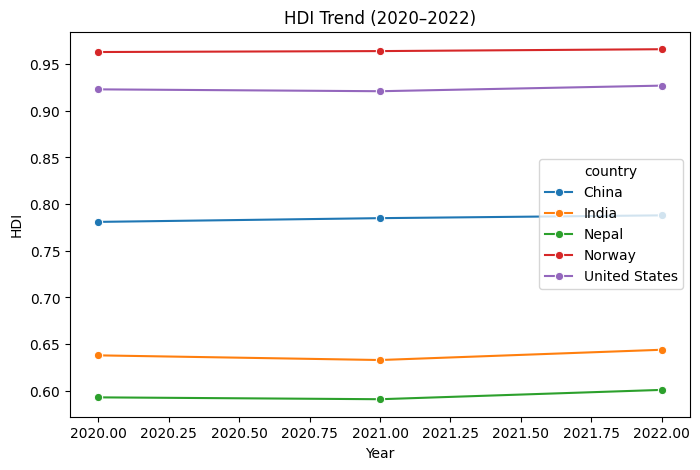

In [169]:
#Line Chart Export
plt.figure(figsize=(8,5))
sns.lineplot(data=line_df, x='year', y='hdi', hue='country', marker='o')
plt.title("HDI Trend (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")

plt.savefig("Figure1_HDI_Trend_2020_2022.png", dpi=300, bbox_inches='tight')
plt.show()


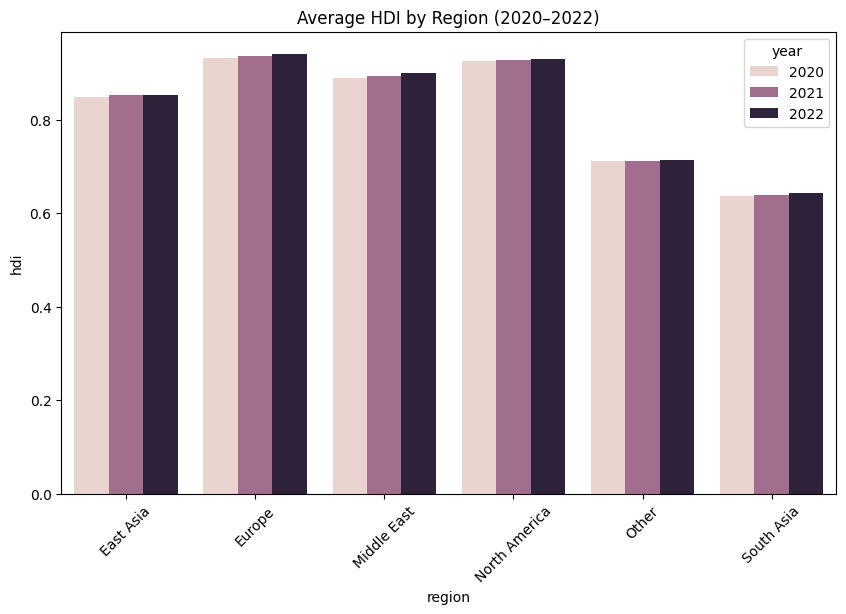

In [170]:
# Bar Chart Export
plt.figure(figsize=(10,6))
sns.barplot(data=region_avg, x='region', y='hdi', hue='year')
plt.xticks(rotation=45)
plt.title("Average HDI by Region (2020–2022)")

plt.savefig("Figure2_Average_HDI_by_Region.png", dpi=300, bbox_inches='tight')
plt.show()


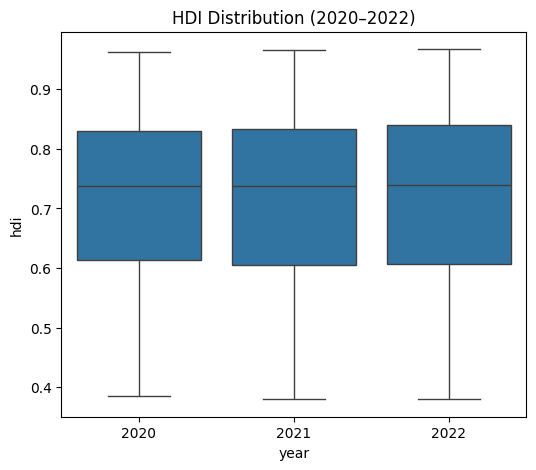

In [171]:
#Box Plot Export
plt.figure(figsize=(6,5))
sns.boxplot(data=hdi_1b_df, x='year', y='hdi')
plt.title("HDI Distribution (2020–2022)")

plt.savefig("Figure3_HDI_Boxplot.png", dpi=300, bbox_inches='tight')
plt.show()


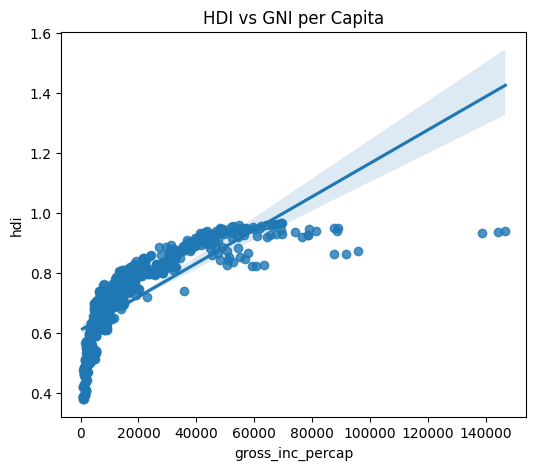

In [172]:
#Scatter Plot Export
plt.figure(figsize=(6,5))
sns.regplot(data=hdi_1b_df, x='gross_inc_percap', y='hdi')
plt.title("HDI vs GNI per Capita")

plt.savefig("Figure4_HDI_vs_GNI.png", dpi=300, bbox_inches='tight')
plt.show()


In [173]:
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives",
    "Nepal", "Pakistan", "Sri Lanka"
    ]

In [174]:
south_asia_df = df[df['country'].isin(south_asian_countries)].copy()
south_asia_df

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,5474,LKA,Sri Lanka,2018,0.774,75.748,21.580710,0.755658,0.782754,79.493,...,0.965,0.366,82.841949,82.894043,5.777778,94.222222,33.48,72.93,0.931244,5.0224
5474,5475,LKA,Sri Lanka,2019,0.775,76.008,21.649664,0.754920,0.784578,79.743,...,0.962,0.369,80.170418,82.056427,5.333333,94.666667,34.40,72.93,0.980717,4.6892
5475,5476,LKA,Sri Lanka,2020,0.777,76.393,21.715080,0.754518,0.786264,80.111,...,0.960,0.370,83.963470,84.235222,5.381166,94.618834,31.96,71.80,0.949787,4.4117
5476,5477,LKA,Sri Lanka,2021,0.783,76.399,21.773440,0.752699,0.798247,79.502,...,0.943,0.377,80.645348,83.286453,5.381166,94.618834,29.68,70.69,0.924002,5.0605


In [175]:
south_asia_df.to_csv("/content/drive/MyDrive/HDI_SouthAsia.csv", index=False)

In [176]:
south_asia_df['country'].value_counts()

,count
country,
Afghanistan,33
Bangladesh,33
Bhutan,33
India,33
Maldives,33
Nepal,33
Pakistan,33
Sri Lanka,33


In [177]:
df_sa = pd.read_csv("/content/drive/MyDrive/HDI_SouthAsia.csv",encoding="latin1")
df_sa

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,5474,LKA,Sri Lanka,2018,0.774,75.748,21.580710,0.755658,0.782754,79.493,...,0.965,0.366,82.841949,82.894043,5.777778,94.222222,33.48,72.93,0.931244,5.0224
260,5475,LKA,Sri Lanka,2019,0.775,76.008,21.649664,0.754920,0.784578,79.743,...,0.962,0.369,80.170418,82.056427,5.333333,94.666667,34.40,72.93,0.980717,4.6892
261,5476,LKA,Sri Lanka,2020,0.777,76.393,21.715080,0.754518,0.786264,80.111,...,0.960,0.370,83.963470,84.235222,5.381166,94.618834,31.96,71.80,0.949787,4.4117
262,5477,LKA,Sri Lanka,2021,0.783,76.399,21.773440,0.752699,0.798247,79.502,...,0.943,0.377,80.645348,83.286453,5.381166,94.618834,29.68,70.69,0.924002,5.0605


In [178]:
df_sa['life_expectancy'] = pd.to_numeric(df_sa['life_expectancy'], errors='coerce')
df_sa['gross_inc_percap'] = pd.to_numeric(df_sa['gross_inc_percap'], errors='coerce')
df_sa['hdi'] = pd.to_numeric(df_sa['hdi'], errors='coerce')

df_sa_clean = df_sa.dropna(subset=['life_expectancy', 'gross_inc_percap', 'hdi'])
df_sa_clean

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,5474,LKA,Sri Lanka,2018,0.774,75.748,21.580710,0.755658,0.782754,79.493,...,0.965,0.366,82.841949,82.894043,5.777778,94.222222,33.48,72.93,0.931244,5.0224
260,5475,LKA,Sri Lanka,2019,0.775,76.008,21.649664,0.754920,0.784578,79.743,...,0.962,0.369,80.170418,82.056427,5.333333,94.666667,34.40,72.93,0.980717,4.6892
261,5476,LKA,Sri Lanka,2020,0.777,76.393,21.715080,0.754518,0.786264,80.111,...,0.960,0.370,83.963470,84.235222,5.381166,94.618834,31.96,71.80,0.949787,4.4117
262,5477,LKA,Sri Lanka,2021,0.783,76.399,21.773440,0.752699,0.798247,79.502,...,0.943,0.377,80.645348,83.286453,5.381166,94.618834,29.68,70.69,0.924002,5.0605


In [179]:
df_2022 = df_sa_clean[df_sa_clean['year'] == 2022].copy()

# min-max normalization
df_2022['life_exp_norm'] = (
    (df_2022['life_expectancy'] - df_2022['life_expectancy'].min()) /
    (df_2022['life_expectancy'].max() - df_2022['life_expectancy'].min())
)

df_2022['gni_norm'] = (
    (df_2022['gross_inc_percap'] - df_2022['gross_inc_percap'].min()) /
    (df_2022['gross_inc_percap'].max() - df_2022['gross_inc_percap'].min())
)

# Calculate Composite Score for df_2022
df_2022['composite_score'] = (
    0.30 * df_2022['life_exp_norm'] +
    0.30 * df_2022['gni_norm']
)

# Sort
df_2022_sorted = df_2022.sort_values(by='composite_score', ascending=False)

df_2022_sorted[['country', 'composite_score', 'hdi']]

,country,composite_score,hdi
164,Maldives,0.600000,0.762
263,Sri Lanka,0.410342,0.780
98,Bhutan,0.315326,0.681
65,Bangladesh,0.269390,0.670
131,India,0.177463,0.644
197,Nepal,0.173122,0.601
230,Pakistan,0.128527,0.540
32,Afghanistan,0.000000,0.462


In [180]:
df_2022 = df_sa_clean[df_sa_clean['year'] == 2022].copy() #min-max normalization
df_2022['life_exp_norm'] = ( (df_2022['life_expectancy'] - df_2022['life_expectancy'].min()) / (df_2022['life_expectancy'].max() - df_2022['life_expectancy'].min()) )
df_2022['gni_norm'] = ( (df_2022['gross_inc_percap'] - df_2022['gross_inc_percap'].min()) / (df_2022['gross_inc_percap'].max() - df_2022['gross_inc_percap'].min()) )
# Calculate Composite Score for
df_2022
df_2022['composite_score'] = ( 0.30 * df_2022['life_exp_norm'] + 0.30 * df_2022['gni_norm'] )
#Sort
df_2022_sorted = df_2022.sort_values(by='composite_score', ascending=False)
df_2022_sorted[['country', 'composite_score', 'hdi']]

,country,composite_score,hdi
164,Maldives,0.600000,0.762
263,Sri Lanka,0.410342,0.780
98,Bhutan,0.315326,0.681
65,Bangladesh,0.269390,0.670
131,India,0.177463,0.644
197,Nepal,0.173122,0.601
230,Pakistan,0.128527,0.540
32,Afghanistan,0.000000,0.462


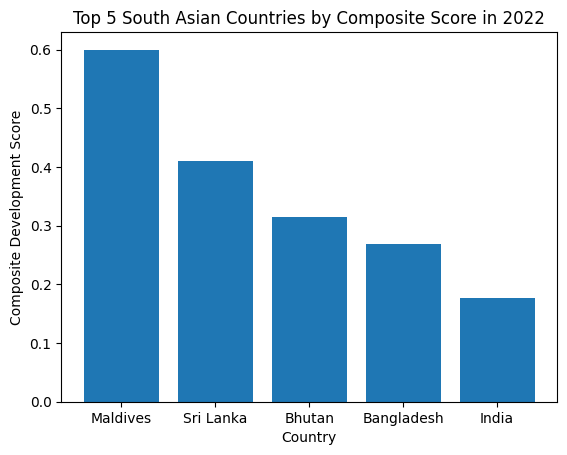

In [181]:
#Plot the top 5 countries in a horizontal bar chart.
df_2022_sorted = df_2022.sort_values(by='composite_score', ascending=False)

top5 = df_2022_sorted.head(5)
top5[['country', 'composite_score', 'hdi']]

plt.figure()

plt.bar(top5['country'], top5['composite_score'])
plt.ylabel('Composite Development Score')
plt.xlabel('Country')
plt.title('Top 5 South Asian Countries by Composite Score in 2022')
plt.show()

In [182]:
df_sa = pd.read_csv("/content/drive/MyDrive/HDI_SouthAsia.csv", encoding="latin1")
df_sa = df_sa[df_sa['year'] == 2022].copy()

df_sa['hdi'] = pd.to_numeric(df_sa['hdi'], errors='coerce')
df_sa['gross_inc_percap'] = pd.to_numeric(df_sa['gross_inc_percap'], errors='coerce')

df_sa_clean = df_sa.dropna(subset=['hdi', 'gross_inc_percap'])

def iqr_qutliers(series):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return (series < lower_bound) | (series > upper_bound)


df_sa['hdi_outliers'] = iqr_qutliers(df_sa['hdi'])
df_sa['gni_outliers'] = iqr_qutliers(df_sa['gross_inc_percap'])

df_sa['outlier'] = df_sa['hdi_outliers'] | df_sa['gni_outliers']

df_sa[df_sa['outlier']][['country', 'hdi', 'gross_inc_percap']]

,country,hdi,gross_inc_percap


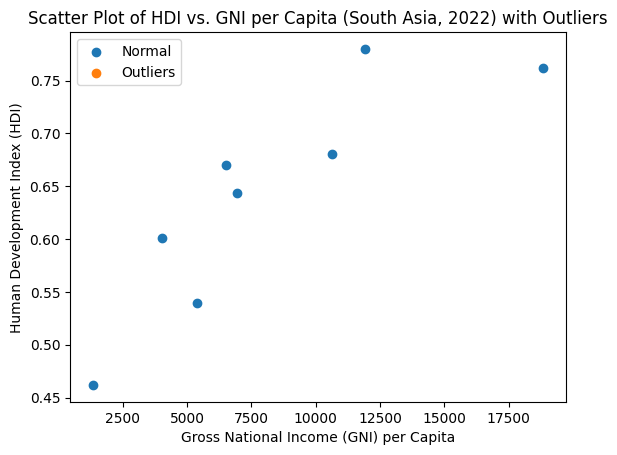

In [183]:
# Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.
plt.figure()
plt.scatter(
    df_sa.loc[~df_sa['outlier'], 'gross_inc_percap'],
    df_sa.loc[~df_sa['outlier'], 'hdi'],
    label="Normal"
)

plt.scatter(
    df_sa.loc[df_sa['outlier'], 'gross_inc_percap'],
    df_sa.loc[df_sa['outlier'], 'hdi'],
    label="Outliers"
)

plt.xlabel('Gross National Income (GNI) per Capita')
plt.ylabel('Human Development Index (HDI)')
plt.title('Scatter Plot of HDI vs. GNI per Capita (South Asia, 2022) with Outliers')
plt.legend()
plt.show()

In [184]:
df_sa = df_sa[df_sa['year'] == 2022].copy()

cols = ['hdi', 'gender_development', 'life_expectancy']

for c in cols:
  df_sa[c] = pd.to_numeric(df_sa[c], errors='coerce')

df_sa = df_sa.dropna(subset=cols)

corr_gender = df_sa['hdi'].corr(df_sa['gender_development'])
corr_life = df_sa['hdi'].corr(df_sa['life_expectancy'])

corr_gender, corr_life

(np.float64(0.8847595354487648), np.float64(0.9281974040239386))

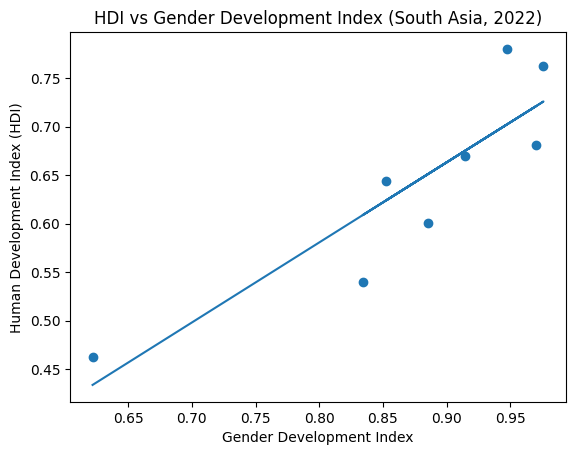

In [185]:
# Create scatter plots with trendlines to visualize the relationships.
plt.figure()
plt.scatter(df_sa['gender_development'], df_sa['hdi'])

x = df_sa['gender_development']
y = df_sa['hdi']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.xlabel('Gender Development Index')
plt.ylabel('Human Development Index (HDI)')
plt.title("HDI vs Gender Development Index (South Asia, 2022)")
plt.show()

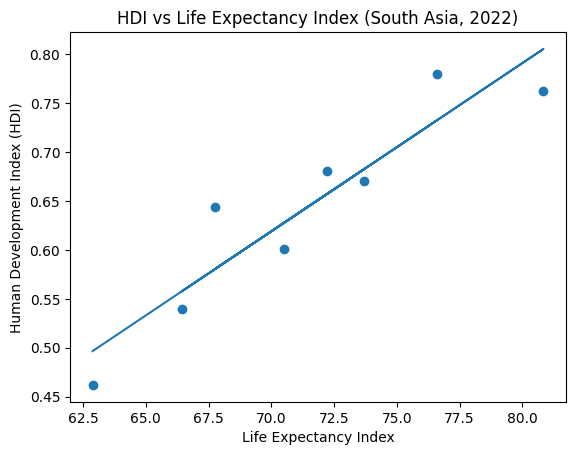

In [186]:
plt.figure()
plt.scatter(df_sa['life_expectancy'], df_sa['hdi'])

x = df_sa['life_expectancy']
y = df_sa['hdi']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.xlabel('Life Expectancy Index')
plt.ylabel('Human Development Index (HDI)')
plt.title("HDI vs Life Expectancy Index (South Asia, 2022)")
plt.show()

In [187]:
df_sa['gni_hdi_gap'] = df_sa['gross_inc_percap'] - df_sa['hdi']
df_sa[['country', 'gross_inc_percap', 'hdi', 'gni_hdi_gap']]

,country,gross_inc_percap,hdi,gni_hdi_gap
32,Afghanistan,1335.205733,0.462,1334.743733
65,Bangladesh,6511.122178,0.670,6510.452178
98,Bhutan,10624.873880,0.681,10624.192880
131,India,6950.526798,0.644,6949.882798
164,Maldives,18846.792190,0.762,18846.030190
197,Nepal,4025.554685,0.601,4024.953685
230,Pakistan,5374.270423,0.540,5373.730423
263,Sri Lanka,11899.498470,0.780,11898.718470


In [188]:
gap_desc = df_sa.sort_values(by='gni_hdi_gap', ascending=False)
gap_asc = df_sa.sort_values(by='gni_hdi_gap', ascending=True)

gap_desc[['country', 'gross_inc_percap']], gap_asc[['country', 'gni_hdi_gap']]

(         country  gross_inc_percap
 164     Maldives      18846.792190
 263    Sri Lanka      11899.498470
 98        Bhutan      10624.873880
 131        India       6950.526798
 65    Bangladesh       6511.122178
 230     Pakistan       5374.270423
 197        Nepal       4025.554685
 32   Afghanistan       1335.205733,
          country   gni_hdi_gap
 32   Afghanistan   1334.743733
 197        Nepal   4024.953685
 230     Pakistan   5373.730423
 65    Bangladesh   6510.452178
 131        India   6949.882798
 98        Bhutan  10624.192880
 263    Sri Lanka  11898.718470
 164     Maldives  18846.030190)

In [189]:
top_positive = gap_desc.head(3)
top_negative = gap_asc.head(3)

gap_plot = pd.concat([top_positive, top_negative])
gap_plot

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,hdi_outliers,gni_outliers,outlier,gni_hdi_gap
164,3531,MDV,Maldives,2022,0.762,80.839,0.523787,0.748233,0.767001,81.844,...,4.597701,95.402299,53.34,78.21,3.299409,NaN,False,False,False,18846.030190
263,5478,LKA,Sri Lanka,2022,0.780,76.610,21.832143,0.750765,0.792700,80.230,...,5.333333,94.666667,29.68,70.69,0.924002,4.9743,False,False,False,11898.718470
98,660,BTN,Bhutan,2022,0.681,72.229,0.782455,0.669680,0.690410,74.152,...,15.714286,84.285714,53.48,73.45,1.366198,24.7398,False,False,False,10624.192880
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,27.215190,72.784810,23.33,77.09,0.306318,1.1809,False,False,False,1334.743733
197,4092,NPL,Nepal,2022,0.601,70.484,30.547580,0.562283,0.635119,72.364,...,33.832335,66.167665,27.91,54.95,0.520340,8.4528,False,False,False,4024.953685
230,4389,PAK,Pakistan,2022,0.540,66.431,235.824862,0.479545,0.574878,68.918,...,20.135747,79.864253,24.53,80.67,0.965639,4.2447,False,False,False,5373.730423


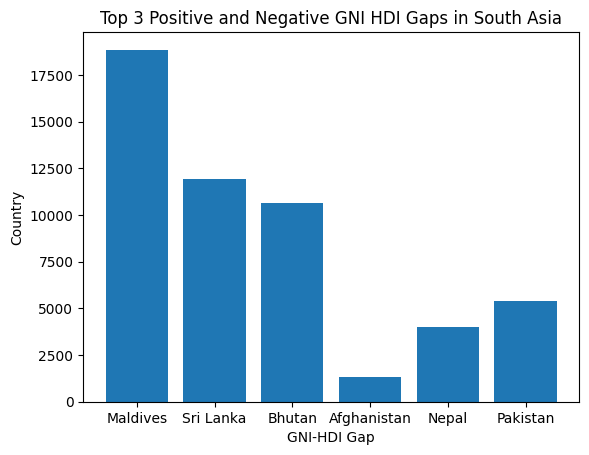

In [190]:
plt.figure()

plt.bar(
    gap_plot['country'],
    gap_plot['gni_hdi_gap'],
)

plt.xlabel('GNI-HDI Gap')
plt.ylabel('Country')
plt.title('Top 3 Positive and Negative GNI HDI Gaps in South Asia')
plt.show()

In [191]:
df = pd.read_csv("/content/HDI_problem1B.csv", encoding="latin1")
df

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,31,AFG,Afghanistan,2020,0.488,62.575000,38.972231,0.381373,0.548741,65.432000,...,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.500000,66.840000,0.305040,1.555400
1,32,AFG,Afghanistan,2021,0.473,61.982000,40.099462,0.379129,0.528559,65.279000,...,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.330000,77.090000,0.306318,1.235100
2,33,AFG,Afghanistan,2022,0.462,62.879000,41.128771,0.332443,0.534145,66.213000,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.330000,77.090000,0.306318,1.180900
3,64,ALB,Albania,2020,0.784,76.989000,2.866849,0.775404,0.793220,79.676000,...,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.450000,68.910000,1.750668,10.470400
4,65,ALB,Albania,2021,0.785,76.463000,2.854710,0.777866,0.792942,79.173000,...,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.080000,69.910000,1.717758,11.586500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6764,ZZJ.SSA,Sub-Saharan Africa,2021,0.546,60.112445,1118.480023,0.521533,0.571211,62.124100,...,0.913,0.567,31.006847,42.166091,25.715752,74.284248,62.229157,75.015130,0.726869,3.855841
614,6765,ZZJ.SSA,Sub-Saharan Africa,2022,0.549,60.639700,1146.742474,0.525081,0.573585,62.621953,...,0.915,0.565,30.864417,42.045967,26.360216,73.639784,63.919192,76.428981,0.720271,3.786977
615,6796,ZZK.WORLD,World,2020,0.736,72.257355,7806.602793,0.715597,0.753310,74.857415,...,0.950,0.463,64.385236,71.331807,25.370844,74.629156,45.457446,72.687775,4.336829,12.178989
616,6797,ZZK.WORLD,World,2021,0.735,71.365524,7874.877719,0.714806,0.751553,73.978883,...,0.951,0.463,64.325131,71.182639,25.913010,74.086990,46.169728,73.349464,4.520335,12.456034


In [224]:
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives",
    "Nepal", "Pakistan", "Sri Lanka"
    ]

In [193]:
df_middle_east_2020_2022 = df[df['country'].isin(middle_east_countries)].copy()

df_middle_east_2020_2022['country'].unique()


df_south_asia_2020_2022 = df[df['country'].isin(south_asian_countries)].copy()

df_south_asia_2020_2022['country'].unique()

array(['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives',
       'Nepal', 'Pakistan', 'Sri Lanka'], dtype=object)

In [194]:
df_middle_east_2020_2022.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)
df_south_asia_2020_2022.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)

In [195]:
south_asia_df = pd.read_csv("/content/HDI_SouthAsia_2020_2022.csv", encoding="latin1")
middle_east_df = pd.read_csv("/content/HDI_MiddleEast_2020_2022.csv", encoding="latin1")

In [196]:
south_asia_stats = south_asia_df['hdi'].agg(['mean', 'std'])
south_asia_stats



,hdi
mean,0.639583
std,0.098273


In [197]:
#Middle East

middle_east_stats = middle_east_df['hdi'].agg(['mean', 'std'])
middle_east_stats

,hdi
mean,0.788909
std,0.141295


In [198]:
#Average HDI per Country
sa_avg = south_asia_df.groupby('country')['hdi'].mean().reset_index()
me_avg = middle_east_df.groupby('country')['hdi'].mean().reset_index()

In [199]:
#SouthAsia
sa_top3 = sa_avg.sort_values("hdi", ascending=False).head(3)
sa_top3

,country,hdi
7,Sri Lanka,0.780000
4,Maldives,0.750667
2,Bhutan,0.677667


In [200]:
sa_bottom3 = sa_avg.sort_values("hdi").head(3)
sa_bottom3

,country,hdi
0,Afghanistan,0.474333
6,Pakistan,0.537667
5,Nepal,0.595000


In [201]:
#MiddleEast
me_top3 = me_avg.sort_values("hdi", ascending=False).head(3)
me_top3

,country,hdi
9,United Arab Emirates,0.932667
2,Israel,0.910667
0,Bahrain,0.885333


In [202]:
me_bottom3 = me_avg.sort_values("hdi").head(3)
me_bottom3

,country,hdi
10,Yemen,0.426333
1,Iraq,0.667000
5,Lebanon,0.730000


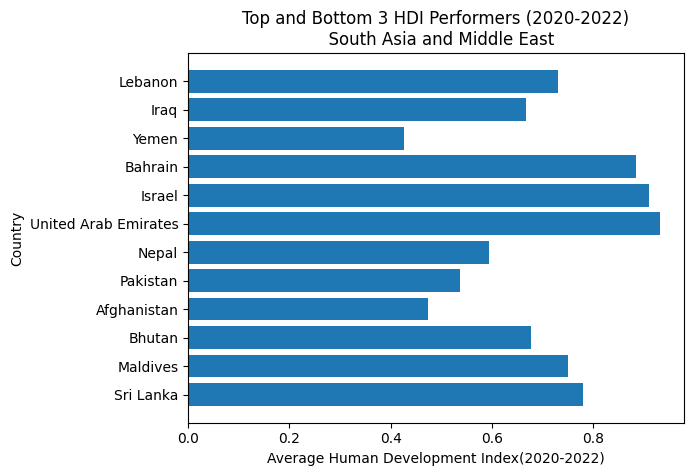

In [203]:
plot_df = pd.concat([
    sa_top3.assign(Group="South Asia - Top 3"),
    sa_bottom3.assign(Group="South Asia - Bottom 3"),
    me_top3.assign(Group="Middle East - Top 3"),
    me_bottom3.assign(Group="Middle East - Bottom 3")
])

plt.figure()
plt.barh(plot_df['country'], plot_df['hdi'])
plt.xlabel('Average Human Development Index(2020-2022)')
plt.ylabel('Country')
plt.title('Top and Bottom 3 HDI Performers (2020-2022)\n  South Asia and Middle East')
plt.show()

In [204]:
metrics = [
    'gender_development',
    'life_expectancy',
    'gross_inc_percap'
]

south_asia_avg = south_asia_df[metrics].mean()
middle_east_avg = middle_east_df[metrics].mean()

In [205]:
comparison_df = pd.DataFrame({
    "Metric": metrics,
    "South Asia": south_asia_avg.values,
    "Middle East": middle_east_avg.values
})

comparison_df

,Metric,South Asia,Middle East
0,gender_development,0.881458,0.896545
1,life_expectancy,70.970083,75.855455
2,gross_inc_percap,7766.509931,37750.770520


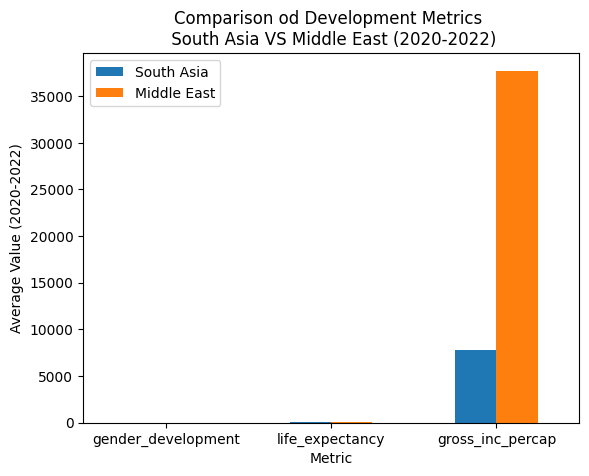

In [206]:
comparison_df.set_index('Metric').plot(kind='bar')


plt.xlabel("Metric")
plt.ylabel("Average Value (2020-2022)")
plt.title("Comparison od Development Metrics \n South Asia VS Middle East (2020-2022)")
plt.xticks(rotation=0)
plt.show()

In [207]:
sa_hdi_range = south_asia_df['hdi'].max() - south_asia_df['hdi'].min()
me_hdi_range = middle_east_df['hdi'].max() - middle_east_df['hdi'].min()

sa_hdi_range, me_hdi_range

(0.321, 0.5130000000000001)

In [208]:
#South Asia CV

sa_mean = south_asia_df['hdi'].mean()
sa_std = south_asia_df['hdi'].std()
sa_cv = sa_std / sa_mean

#Middle East CV
me_mean = middle_east_df["hdi"].mean()
me_std = middle_east_df["hdi"].std()
me_cv = me_std / me_mean

sa_cv, me_cv

(np.float64(0.1536520924690084), np.float64(0.17910145193048382))

In [209]:
summary_df = pd.DataFrame({
    "Region": ["South Asia", "Middle East"],
    "Range": [sa_hdi_range, me_hdi_range],
    "`HDI Cofficient of Variation(CV)": [sa_cv, me_cv]
})

summary_df

,Region,Range,`HDI Cofficient of Variation(CV)
0,South Asia,0.321,0.153652
1,Middle East,0.513,0.179101


In [210]:
#South Asia
sa_corr_gender = south_asia_df['hdi'].corr(south_asia_df['gender_development'])
sa_corr_life = south_asia_df['hdi'].corr(south_asia_df['life_expectancy'])

sa_corr_gender, sa_corr_life

(np.float64(0.8742177004831327), np.float64(0.9387641385416623))

In [211]:
#Middle east
me_corr_gender = middle_east_df['hdi'].corr(middle_east_df['gender_development'])
me_corr_life = middle_east_df['hdi'].corr(middle_east_df['life_expectancy'])

me_corr_gender, me_corr_life

(np.float64(0.9356697525724119), np.float64(0.9331227568940162))

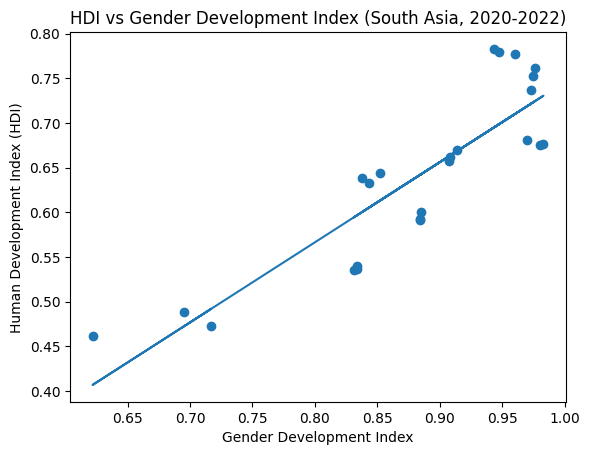

In [212]:
#Scatter Plot: South Asia (Gender Development vs HDI)

plt.figure()
plt.scatter(south_asia_df['gender_development'], south_asia_df['hdi'])

z = np.polyfit(south_asia_df['gender_development'], south_asia_df['hdi'], 1)
p = np.poly1d(z)
plt.plot(
    south_asia_df['gender_development'],
    p(south_asia_df['gender_development'])
)

plt.xlabel('Gender Development Index')
plt.ylabel('Human Development Index (HDI)')
plt.title("HDI vs Gender Development Index (South Asia, 2020-2022)")
plt.show()

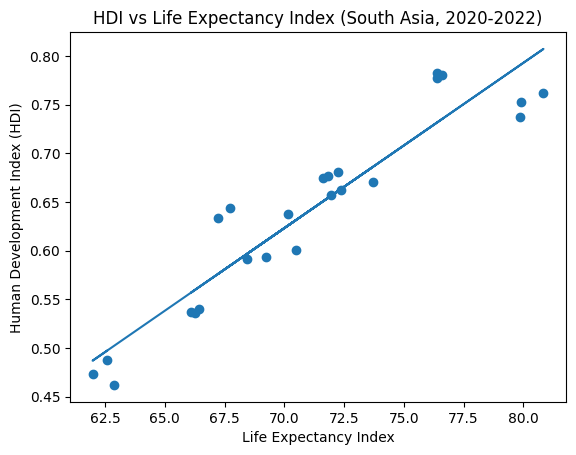

In [213]:
#Scatter Plot: South Asia (Life Expectancy vs HDI)
plt.figure()
plt.scatter(south_asia_df['life_expectancy'], south_asia_df['hdi'])

z = np.polyfit(south_asia_df['life_expectancy'], south_asia_df['hdi'], 1)
p = np.poly1d(z)
plt.plot(
    south_asia_df['life_expectancy'],
    p(south_asia_df['life_expectancy'])
)

plt.xlabel('Life Expectancy Index')
plt.ylabel('Human Development Index (HDI)')
plt.title("HDI vs Life Expectancy Index (South Asia, 2020-2022)")
plt.show()

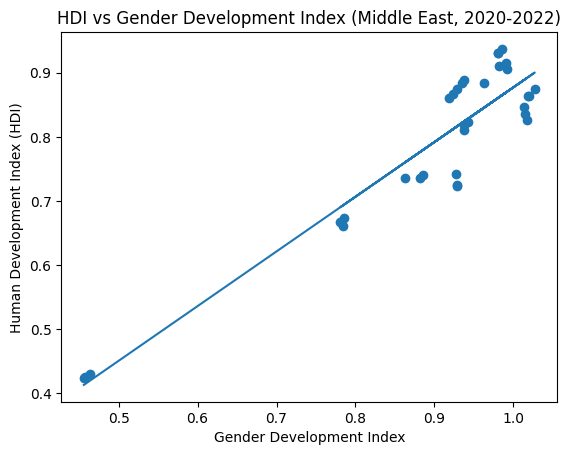

In [214]:
#Scatter Plot: Middle East (Gender Development vs HDI)
plt.figure()
plt.scatter(middle_east_df['gender_development'], middle_east_df['hdi'])

z = np.polyfit(middle_east_df['gender_development'], middle_east_df['hdi'], 1)
p = np.poly1d(z)

plt.plot(
    middle_east_df['gender_development'],
    p(middle_east_df['gender_development'])
)

plt.xlabel('Gender Development Index')
plt.ylabel('Human Development Index (HDI)')
plt.title("HDI vs Gender Development Index (Middle East, 2020-2022)")
plt.show()

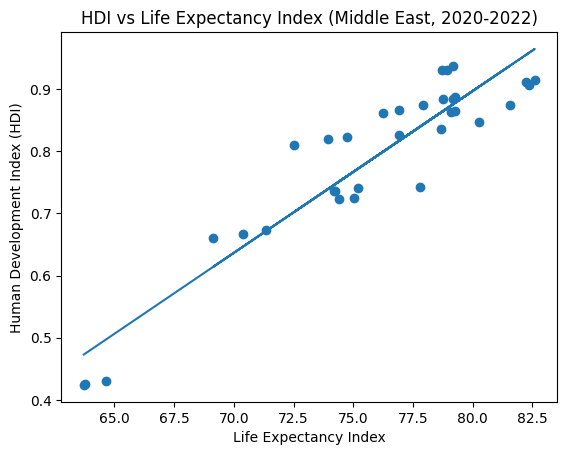

In [215]:
#Scatter Plot: Middle East (Life Expectancy vs HDI)
plt.figure()
plt.scatter(middle_east_df['life_expectancy'], middle_east_df['hdi'])

z = np.polyfit(middle_east_df['life_expectancy'], middle_east_df['hdi'], 1)
p = np.poly1d(z)

plt.plot(
    middle_east_df['life_expectancy'],
    p(middle_east_df['life_expectancy'])
)

plt.xlabel('Life Expectancy Index')
plt.ylabel('Human Development Index (HDI)')
plt.title("HDI vs Life Expectancy Index (Middle East, 2020-2022)")
plt.show()

In [216]:
def detect_outliers_iqr(series):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  return (series < lower_bound) | (series > upper_bound)

In [223]:
#South Asia

south_asia_df['HDI_Outliers'] = detect_outliers_iqr(south_asia_df['hdi'])
south_asia_df['GNI_Outliers'] = detect_outliers_iqr(south_asia_df['gross_inc_percap'])

south_asia_df['GNI_Outliers'].value_counts()

,count
GNI_Outliers,
False,24


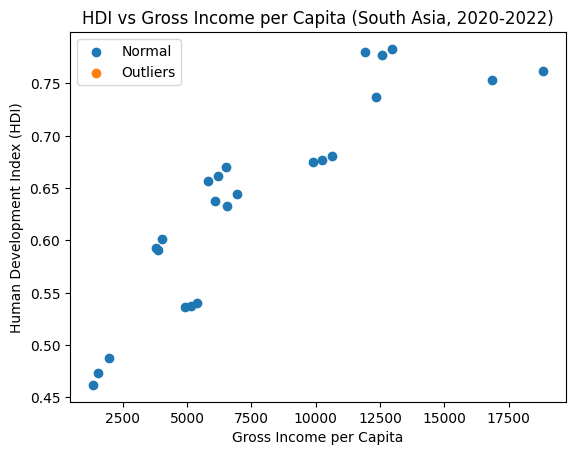

In [218]:
plt.figure()
plt.scatter(
    south_asia_df.loc[~south_asia_df['GNI_Outliers'], 'gross_inc_percap'],
    south_asia_df.loc[~south_asia_df['GNI_Outliers'], 'hdi'],
    label="Normal"
)

plt.scatter(
    south_asia_df.loc[south_asia_df['GNI_Outliers'], 'gross_inc_percap'],
    south_asia_df.loc[south_asia_df['GNI_Outliers'], 'hdi'],
    label="Outliers"
)

plt.xlabel('Gross Income per Capita')
plt.ylabel('Human Development Index (HDI)')
plt.title("HDI vs Gross Income per Capita (South Asia, 2020-2022)")
plt.legend()
plt.show()

In [221]:
middle_east_df['HDI_Outliers'] = detect_outliers_iqr(middle_east_df['hdi'])
middle_east_df['GNI_Outliers'] = detect_outliers_iqr(middle_east_df['gross_inc_percap'])

middle_east_df['GNI_Outliers'].value_counts()

,count
GNI_Outliers,
False,33


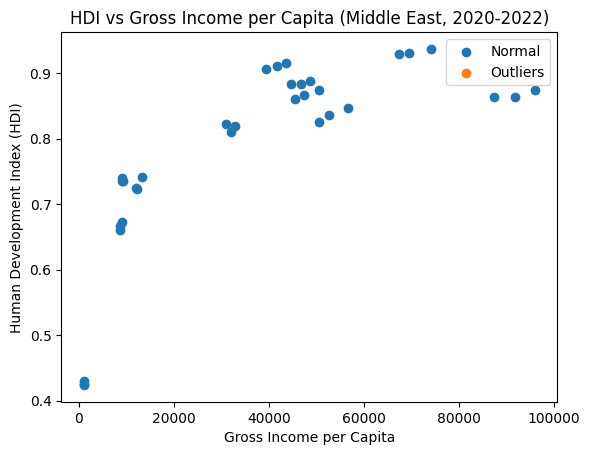

In [222]:
plt.figure()
plt.scatter(
    middle_east_df.loc[~middle_east_df['GNI_Outliers'], 'gross_inc_percap'],
    middle_east_df.loc[~middle_east_df['GNI_Outliers'], 'hdi'],
    label="Normal"
)

plt.scatter(
    middle_east_df.loc[middle_east_df['GNI_Outliers'], 'gross_inc_percap'],
    middle_east_df.loc[middle_east_df['GNI_Outliers'], 'hdi'],
    label="Outliers"
)

plt.xlabel('Gross Income per Capita')
plt.ylabel('Human Development Index (HDI)')
plt.title("HDI vs Gross Income per Capita (Middle East, 2020-2022)")
plt.legend()